In [0]:
%tensorflow_version 2.x
import tensorflow as tf # WELL...
import numpy as np # data manipulation
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # visualise the results

from sklearn.datasets import load_wine # dataset
from sklearn.preprocessing import StandardScaler # Scaler for Normalization
from sklearn.model_selection import train_test_split # Split the dataset to test and train sets for us

In [0]:
# First, lets load the dataset
dataset = load_wine()

In [0]:
# Look at few things
dataset.data.shape
# so we have 178 samples with 13 features 

(178, 13)

In [0]:
dataset.target_names
# also we have 3 classes

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [0]:
dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [0]:
pd.DataFrame(dataset.data, columns = dataset.feature_names)
# we can see there's few features which are in bigger ranges than others (alcohol, alcalinity, magnesium, PROLINE)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [0]:
# Since we have 3 different classes, we'll transform it with one hot encoder in pandas
target = pd.get_dummies(dataset.target, drop_first = True) # Dropping first column because of dummy variable trap

In [0]:
# Now split the dataset
X_train, X_test, y_train, y_test = train_test_split(dataset.data, target, test_size = .35 ,random_state = 8) # with random_state argument, we will get same split everytime
# Also get the shape of train so we can pass it directly to nn layer
N, D = X_train.shape

In [0]:
# Now normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

115/115 [==============================] - 0s 87us/sample - loss: 0.0333 - accuracy: 0.9130
Train scores: [0.03331362057639205, 0.9130435]
63/63 [==============================] - 0s 116us/sample - loss: 0.0493 - accuracy: 0.9683
Test scores: [0.04927227371150539, 0.96825397]


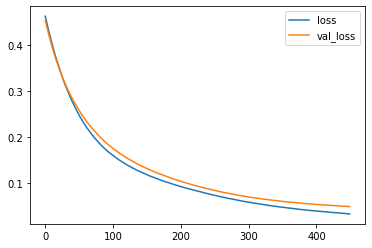

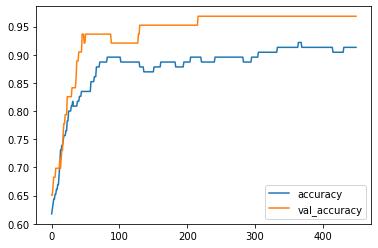

In [0]:
# Alright! Let's use some tensorflow now
# I created the model in one line on example with Iris dataset, so now I'll add the Dense layer after initializing the Sequential object
model = tf.keras.models.Sequential()
# Adding Dense layer, our output dimensionality is 2 so first parameter will be 2, I'll be using sigmoid function. 
# Also now we can use our D variable to specify the input shape to input_shape parameter. With that, model will expect (*, 16) as input size
model.add(tf.keras.layers.Dense(2, activation = 'sigmoid', input_shape = (D,)))

# We can compile the model now
# I'll be using adams algorithm as optimizer, categorical cross entropy as loss function and accuracy as metric.
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Now we can fit the data to model.
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 450, verbose = 0) # Let's start with 100 epochs - edit: after trying few values, I found that 450 is better.
print('Train scores:', model.evaluate(X_train, y_train))
print('Test scores:', model.evaluate(X_test, y_test))

# Now let's plot the results, we'll use the History object that we got from fit() method
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()